In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import geopandas as gpd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from scipy import stats

In [3]:
# URL of the JSON file
url = "https://cycling.data.tfl.gov.uk/CyclingInfrastructure/data/lines/advanced_stop_line.json"

# Fetch the content from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Convert JSON data to pandas DataFrame
    df_adv_stop_line = pd.DataFrame(data)
    
    # Export DataFrame to CSV
    df_adv_stop_line.to_csv('advanced_stop_line_data.csv', index=False)
    
    # Export DataFrame to Excel
    # df.to_excel('signal_data.xlsx', index=False)
    
    print("Data exported successfully.")
else:
    print("Failed to fetch data. Status code:", response.status_code)

Data exported successfully.


In [4]:
# Read in advanced stop line data
rs = pd.read_csv("advanced_stop_line_data.csv")
rs.head()

# Convert to geopandas
grs = gpd.read_file("advanced_stop_line_data.csv")
grs.head(1)

# Plot grs
# rs.plot()

,type,name,features,geometry
0,FeatureCollection,advanced_stop_line,"{'type': 'Feature', 'geometry': {'type': 'Line...",None


In [5]:
# 2021 collision dataset

# Read the xlsx file into a DataFrame
df2 = pd.read_csv("jan-dec-2021-gla-data-extract-casualty.csv", header=1)
df2.head()

,_Collision Id,Borough Name,Borough Number,Easting,Northing,_Casualty Id,_Casualty Class,Casualty Gender,Casualty Age (5 Year Bands),Casualty Age,_Casualty Count,_Casualty Severity,Pedestrian Location,Pedestrian Movement,Casualty Mode of Travel
0,1210287148,Barnet,30,521508,193079,1,Driver/Rider,Male,15-19,19.0,1,Slight,Not Applicable,Not Applicable,Car
1,1210287149,Tower Hamlets,5,535379,180783,1,Passenger,Male,25-29,25.0,1,Slight,Not Applicable,Not Applicable,Car
2,1210287149,Tower Hamlets,5,535379,180783,2,Driver/Rider,Male,20-24,21.0,1,Slight,Not Applicable,Not Applicable,Car
3,1210287149,Tower Hamlets,5,535379,180783,3,Passenger,Male,15-19,17.0,1,Serious,Not Applicable,Not Applicable,Car
4,1210287151,Lambeth,9,529701,170398,1,Driver/Rider,Male,25-29,27.0,1,Slight,Not Applicable,Not Applicable,Car


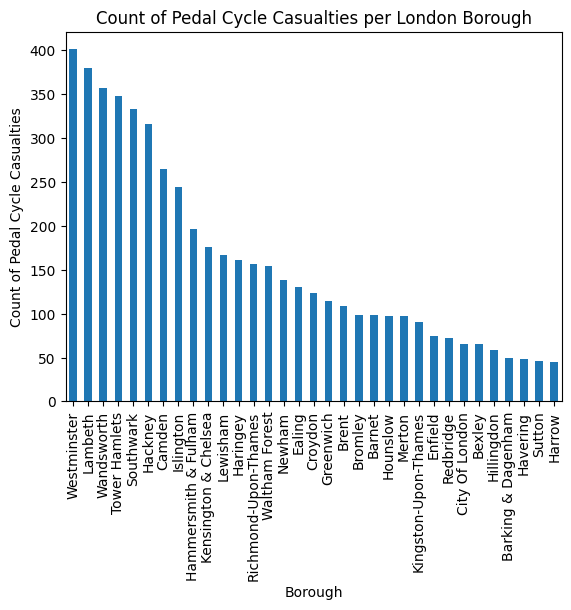

In [6]:
# Plot count of casualties per borough

# Filter to only show Pedal Cycles casualties
borough_casualties = df2[df2["Casualty Mode of Travel"] == "Pedal Cycle"]

# Count casualties per borough
borough_casualties_count = borough_casualties["Borough Name"].value_counts()

# Sort borough casualties count in descending order
borough_casualties_count = borough_casualties_count.sort_values(ascending=False)

# Plot the count of casualties per borough
borough_casualties_count.plot(kind="bar")
plt.xlabel("Borough")
plt.ylabel("Count of Pedal Cycle Casualties")
plt.title("Count of Pedal Cycle Casualties per London Borough")
plt.show()

In [7]:
KSI_Options = ['Serious', 'Fatal']
KSI_2021 = df2[df2["_Casualty Severity"].isin(KSI_Options)]
Mode_Options = ['Bus Or Coach', 'Goods Vehicle', 'Other Vehicle']
KSI_2021 = KSI_2021[~KSI_2021["Casualty Mode of Travel"].isin(Mode_Options)]
casualties_per_mode_2021 = KSI_2021.groupby("Casualty Mode of Travel").size().sort_values(ascending = False)
print(casualties_per_mode_2021)
print(casualties_per_mode_2021.sum())

Casualty Mode of Travel
Pedal Cycle          999
Pedestrian           959
Powered 2 Wheeler    929
Car                  464
Private Hire          11
Taxi                   4
dtype: int64
3366


In [8]:
# 2020 collision dataset

# Read the xlsx file into a DataFrame
df3 = pd.read_csv("2020-gla-data-extract-casualty.csv")
df3.head()

,Accident Ref.,Borough,Boro,Easting,Northing,CREFNO,Casualty Class,Casualty Sex,Casualty Age (Banded),Casualty Age,No. of Casualties,Casualty Severity,Ped. Location,Ped. Movement,Mode of Travel,
0,1200240171,CITY OF LONDON,0,531188,181609,1,1 DRIVER/RIDER,1 MALE,25-59,30.0,1,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,3 POWERED 2 WHEELER,NaN
1,1200246170,CITY OF LONDON,0,533386,181909,1,1 DRIVER/RIDER,1 MALE,25-59,29.0,1,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,2 PEDAL CYCLE,NaN
2,1200246170,CITY OF LONDON,0,533386,181909,2,1 DRIVER/RIDER,'-1 UNKNOWN,UNKNOWN,NaN,1,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,2 PEDAL CYCLE,NaN
3,1200248479,CITY OF LONDON,0,533359,181760,1,1 DRIVER/RIDER,1 MALE,25-59,30.0,1,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,2 PEDAL CYCLE,NaN
4,1200251644,CITY OF LONDON,0,532122,181853,1,1 DRIVER/RIDER,2 FEMALE,25-59,27.0,1,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,2 PEDAL CYCLE,NaN


In [9]:
KSI_Options = ['2 SERIOUS', '1 FATAL']
KSI_2020 = df3[df3["Casualty Severity"].isin(KSI_Options)]
Mode_Options = ['6 BUS OR COACH', '7 GOODS VEHICLE', '8 OTHER VEHICLE']
KSI_2020 = KSI_2020[~KSI_2020["Mode of Travel"].isin(Mode_Options)]
casualties_per_mode_2020 = KSI_2020.groupby("Mode of Travel").size().sort_values(ascending = False)
print(casualties_per_mode_2020)
print(casualties_per_mode_2020.sum())

Mode of Travel
1 PEDESTRIAN           868
2 PEDAL CYCLE          868
3 POWERED 2 WHEELER    768
4 CAR                  416
9 PRIVATE HIRE          12
5 TAXI                   6
dtype: int64
2938


In [10]:
# 2019 collision dataset

# Read the xlsx file into a DataFrame
df4 = pd.read_csv("2019-gla-data-extract-casualty.csv")
df4.head()

,AREFNO,Borough,Boro,Easting,Northing,CREFNO,Casualty Class,Casualty Sex,Casualty Age (Banded),Casualty Age,No. of Casualties,Casualty Severity,Ped Location,Ped Movement,Mode of Travel
0,1190128300,WESTMINSTER,1,528218,180407,1,1 DRIVER/RIDER,1 MALE,25-59,58.0,3,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,4 CAR
1,1190128300,WESTMINSTER,1,528218,180407,2,2 PASSENGER,2 FEMALE,U,NaN,3,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,4 CAR
2,1190128300,WESTMINSTER,1,528218,180407,3,2 PASSENGER,2 FEMALE,U,NaN,3,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,4 CAR
3,1190152270,LAMBETH,9,530219,172463,1,1 DRIVER/RIDER,2 FEMALE,16-24,24.0,1,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,4 CAR
4,1190155191,CAMDEN,2,530222,182543,1,2 PASSENGER,2 FEMALE,16-24,21.0,1,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,2 PEDAL CYCLE


In [11]:
KSI_Options = ['2 SERIOUS', '1 FATAL']
KSI_2019 = df4[df4["Casualty Severity"].isin(KSI_Options)]
Mode_Options = ['6 BUS OR COACH', '7 GOODS VEHICLE', '8 OTHER VEHICLE']
KSI_2019 = KSI_2019[~KSI_2019["Mode of Travel"].isin(Mode_Options)]
casualties_per_mode_2019 = KSI_2019.groupby("Mode of Travel").size().sort_values(ascending = False)
print(casualties_per_mode_2019)
print(casualties_per_mode_2019.sum())

Mode of Travel
1 PEDESTRIAN           1350
3 POWERED 2 WHEELER    1019
2 PEDAL CYCLE           778
4 CAR                   574
5 TAXI                   16
9 PRIVATE HIRE           14
dtype: int64
3751


In [12]:
# 2018 collision dataset

# Read the xlsx file into a DataFrame
df5 = pd.read_csv("2018-data-files-casualty.csv")
df5.head()

,Accident Ref.,Borough,Boro,Easting,Northing,CREFNO,Casualty Class,Casualty Sex,Casualty Age (Banded),Casualty Age,No. of Casualties,Casualty Severity,Ped. Location,Ped. Movement,Mode of Travel,
0,1180087514,CITY OF LONDON,0,533090,181120,1,3 Pedestrian,2 Female,16-24,24,1,3 Slight,06 On Footpath - Verge,9 Unknown Or Other,1 Pedestrian,
1,1180104854,CITY OF LONDON,0,533650,180200,1,1 Driver/Rider,2 Female,16-24,21,1,3 Slight,-2 Unknown,-2 N/A,4 Car,
2,1180104878,CITY OF LONDON,0,531860,181830,1,1 Driver/Rider,1 Male,25-59,32,1,3 Slight,-2 Unknown,-2 N/A,2 Pedal Cycle,
3,1180108670,CITY OF LONDON,0,531109,180810,1,1 Driver/Rider,1 Male,Unknown,0,1,3 Slight,-2 Unknown,-2 N/A,2 Pedal Cycle,
4,1180118053,CITY OF LONDON,0,533834,180877,1,1 Driver/Rider,1 Male,25-59,57,1,3 Slight,-2 Unknown,-2 N/A,2 Pedal Cycle,


In [13]:
KSI_Options = ['2 Serious', '1 Fatal']
KSI_2018 = df5[df5["Casualty Severity"].isin(KSI_Options)]
Mode_Options = ['6 Bus Or Coach', '7 Goods Vehicle', '8 Other Vehicle']
KSI_2018 = KSI_2018[~KSI_2018["Mode of Travel"].isin(Mode_Options)]
casualties_per_mode_2018 = KSI_2018.groupby("Mode of Travel").size().sort_values(ascending = False)
print(casualties_per_mode_2018)
print(casualties_per_mode_2018.sum())

Mode of Travel
1 Pedestrian           1366
3 Powered 2 Wheeler    1080
2 Pedal Cycle           782
4 Car                   623
5 Taxi                   46
dtype: int64
3897


In [14]:
# 2017 collision dataset

# Read the xlsx file into a DataFrame
df6 = pd.read_csv("2017-data-casualty.csv")
df6.head()

,Accident Ref.,Borough,Boro,Easting,Northing,CREFNO,Casualty Class,Casualty Sex,Casualty Age (Banded),Casualty Age,No. of Casualties,Casualty Severity,Ped. Location,Ped. Movement,Mode of Travel,
0,1170014045,CITY OF LONDON,0,532780,180350,1,1 Driver/Rider,1 Male,25-59,34,1,3 Slight,-2 Unknown,-2 N/A,2 Pedal Cycle,
1,1170014113,CITY OF LONDON,0,533841,180787,1,1 Driver/Rider,2 Female,25-59,35,1,3 Slight,-2 Unknown,-2 N/A,2 Pedal Cycle,
2,1170017232,CITY OF LONDON,0,533630,181200,1,3 Pedestrian,1 Male,25-59,37,1,3 Slight,01 Crossing Road On Ped Xing,9 Unknown Or Other,1 Pedestrian,
3,1170019554,CITY OF LONDON,0,531130,181110,1,3 Pedestrian,1 Male,25-59,29,1,2 Serious,01 Crossing Road On Ped Xing,3 From Drivers O/Side,1 Pedestrian,
4,1170020053,CITY OF LONDON,0,531900,181840,1,3 Pedestrian,1 Male,25-59,36,1,2 Serious,09 In Road - Not Crossing,7 In Rd Facing Traffic,1 Pedestrian,


In [15]:
KSI_Options = ['2 Serious', '1 Fatal']
KSI_2017 = df6[df6["Casualty Severity"].isin(KSI_Options)]
Mode_Options = ['6 Bus Or Coach', '7 Goods Vehicle', '8 Other Vehicle']
KSI_2017 = KSI_2017[~KSI_2017["Mode of Travel"].isin(Mode_Options)]
casualties_per_mode_2017 = KSI_2017.groupby("Mode of Travel").size().sort_values(ascending = False)
print(casualties_per_mode_2017)
print(casualties_per_mode_2017.sum())

Mode of Travel
1 Pedestrian           1412
3 Powered 2 Wheeler    1099
2 Pedal Cycle           685
4 Car                   490
5 Taxi                   45
dtype: int64
3731


In [17]:
# 2022 collision dataset

# Read the file into a DataFrame
df7 = pd.read_csv("jan-dec-2022-gla-data-extract-casualties.csv")
df7.head()

,_Collision Id,Borough Name,Borough Number,Easting,Northing,_Casualty Id,_Casualty Class,Casualty Gender,Casualty Age (5 Year Bands),Casualty Age,_Casualty Count,_Casualty Severity,Pedestrian Location,Pedestrian Movement,Casualty Mode of Travel
0,1220352073,Hammersmith & Fulham,11,525199,177928,1,Driver/Rider,Male,15-19,17.0,1,Slight,Not Applicable,Not Applicable,Powered 2 Wheeler
1,1220352573,Greenwich,6,546214,179866,1,Driver/Rider,Female,40-44,42.0,1,Slight,Not Applicable,Not Applicable,Car
2,1220352575,Bexley,18,551119,174789,1,Driver/Rider,Male,20-24,20.0,1,Slight,Not Applicable,Not Applicable,Car
3,1220352578,Enfield,32,528889,192230,1,Driver/Rider,Male,45-49,46.0,1,Slight,Not Applicable,Not Applicable,Car
4,1220352578,Enfield,32,528889,192230,2,Passenger,Male,45-49,45.0,1,Slight,Not Applicable,Not Applicable,Car


In [23]:
KSI_Options = ['Serious', 'Fatal']
KSI_2022 = df7[df7["_Casualty Severity"].isin(KSI_Options)]
Mode_Options = ['Bus Or Coach', 'Goods Vehicle', 'Other Vehicle']
KSI_2022 = KSI_2022[~KSI_2022["Casualty Mode of Travel"].isin(Mode_Options)]

casualties_per_mode_2022 = KSI_2022.groupby("Casualty Mode of Travel").size().sort_values(ascending = False)
print(casualties_per_mode_2022)
print(casualties_per_mode_2022.sum())

Casualty Mode of Travel
Pedestrian           1235
Pedal Cycle          1027
Powered 2 Wheeler     894
Car                   526
Private Hire           13
Taxi                   12
dtype: int64
3707


In [24]:
df_attendant_2022 = pd.read_csv("jan-dec-2022-gla-data-extract-attendant.csv")
df_attendant_2022.head()

# Join 2022 datasets
df2022 = pd.merge(KSI_2022, df_attendant_2022, on='_Collision Id')
df2022.head()

# Group number of casualties by speed limit

sl_casualties2022 = df2022.groupby("Speed Limit").size().sort_values(ascending = False)
print(sl_casualties2022)
print(sl_casualties2022.sum())

Speed Limit
20    1750
30    1669
40     164
50     101
70      11
60       6
10       5
15       1
dtype: int64
3707


In [25]:
df8 = pd.read_csv("2016-gla-data-extract-casualty.csv")
df8.head()

,Accident Ref.,Borough,Boro,Easting,Northing,CREFNO,Casualty Class,Casualty Sex,Casualty Age (Banded),Casualty Age,No. of Casualties,Casualty Severity,Ped. Location,Ped. Movement,Mode of Travel,
0,1160001090,CITY OF LONDON,0,531350,181580,1,3 Pedestrian,1 Male,25-59,54,1,3 Slight,09 In Road - Not Crossing,7 In Rd Facing Traffic,1 Pedestrian,
1,1160002980,CITY OF LONDON,0,532780,180410,1,1 Driver/Rider,1 Male,25-59,46,1,2 Serious,-2 Unknown,-2 N/A,2 Pedal Cycle,
2,1160006347,CITY OF LONDON,0,531400,181570,3,2 Passenger,2 Female,60+,61,1,3 Slight,-2 Unknown,-2 N/A,4 Car,
3,1160006347,CITY OF LONDON,0,531400,181570,2,1 Driver/Rider,1 Male,60+,69,1,3 Slight,-2 Unknown,-2 N/A,4 Car,
4,1160006347,CITY OF LONDON,0,531400,181570,1,1 Driver/Rider,1 Male,16-24,22,1,3 Slight,-2 Unknown,-2 N/A,4 Car,


In [29]:
KSI_Options = ['2 Serious', '1 Fatal']
KSI_2016 = df8[df8["Casualty Severity"].isin(KSI_Options)]
Mode_Options = ['Bus Or Coach', 'Goods Vehicle', 'Other Vehicle']
KSI_2016 = KSI_2016[~KSI_2016["Mode of Travel"].isin(Mode_Options)]

casualties_per_mode_2016 = KSI_2016.groupby("Mode of Travel").size().sort_values(ascending = False)
print(casualties_per_mode_2016)
print(casualties_per_mode_2016.sum())

Mode of Travel
1 Pedestrian           875
3 Powered 2 Wheeler    681
2 Pedal Cycle          454
4 Car                  368
6 Bus Or Coach          70
5 Taxi                  27
7 Goods Vehicle         20
8 Other Vehicle          6
dtype: int64
2501


In [30]:
df_attendant_2016 = pd.read_csv("2016-gla-data-extract-attendant.csv")
df_attendant_2016.head()

# Join 2016 datasets
df2016 = pd.merge(KSI_2016, df_attendant_2016, on='Accident Ref.')
df2016.head()

# Group number of casualties by speed limit

sl_casualties2016 = df2016.groupby("Speed Limit").size().sort_values(ascending = False)
print(sl_casualties2016)
print(sl_casualties2016.sum())

Speed Limit
2 30 MPH       2031
1 <= 20 MPH     262
3 40 MPH        120
4 50 MPH         65
6 70 MPH         22
5 60 MPH          1
dtype: int64
2501


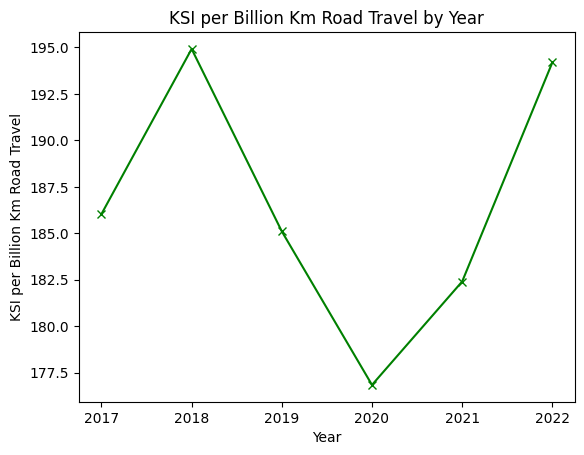

In [52]:
# Create a DataFrame
total_casualties = pd.DataFrame({
    "Year": ["2017", "2018", "2019", "2020", "2021","2022"],
    "KSI Casualties": [3731, 3897, 3751, 2938, 3366, 3707],
    "Total KM Road Travel": [20055359109, 19992861706, 20264369690, 16613638242, 18453291284, 19089347093],
    "KSI Casualties - Speed Limit <= 20 MPH": [750/0.3, 948/0.34, 1024/0.38, 1007/0.42, 1451/0.475, 1750/0.52],
    "Enforcement Actions":[298535,  291956,  349354,  403245,  542737, 791172],
    "Cycle Infrastructure Proxy": [10446044, 10567540, 10168936, 10434167, 10941264, 11505872]
})

# Calculate Total Road Accidents per Million Km Road Travel
total_casualties["KSI per Billion Km Road Travel"] = (total_casualties["KSI Casualties"] / total_casualties["Total KM Road Travel"]) * 1000000000
total_casualties["KSI <= 20"] = (total_casualties["KSI Casualties - Speed Limit <= 20 MPH"] / total_casualties["Total KM Road Travel"]) * 1000000
total_casualties["KSI <= 20, Bus/HGV/Other Removed Per Billion KM Travel"] = total_casualties["KSI Casualties - Speed Limit <= 20 MPH"] / (total_casualties["Total KM Road Travel"] * total_casualties["Enforcement Actions"]) * 1000000000
# Plot the DataFrame
fig, ax = plt.subplots()
ax.plot(total_casualties["Year"], total_casualties["KSI per Billion Km Road Travel"], color="g", marker="x")

# Add a title and labels
plt.title("KSI per Billion Km Road Travel by Year")
plt.xlabel("Year")
plt.ylabel("KSI per Billion Km Road Travel")

plt.show()

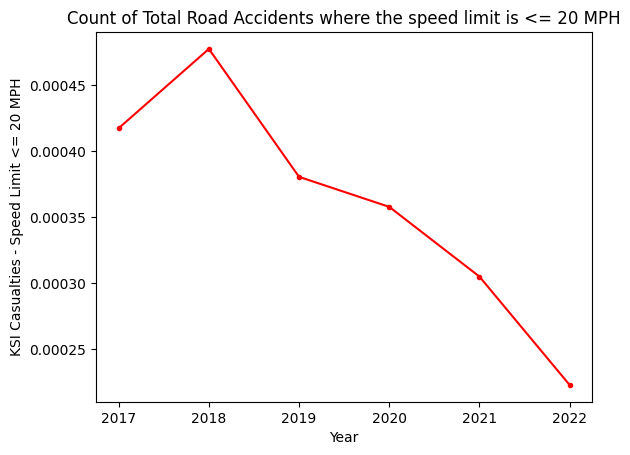

In [53]:
# Plot Total Casualties - Speed Limit
fig, ax = plt.subplots()
ax.plot(total_casualties["Year"], total_casualties["KSI <= 20, Bus/HGV/Other Removed Per Billion KM Travel Per Enforcement Action"], color="r", marker=".")

# Add a title and labels
plt.title("KSI Incidents where the speed limit is <= 20 MPH")
plt.xlabel("Year")
plt.ylabel("KSI Casualties - Speed Limit <= 20 MPH")

plt.show()

In [68]:
X = total_casualties[['Cycle Infrastructure Proxy','Enforcement Actions']]
y = total_casualties[['KSI per Billion Km Road Travel']]
y = y.values.ravel()

#logit_model=sm.Logit(y,X)
#result=logit_model.fit()
#print(result.summary())

freg=f_regression(X,y)

p=freg[1]

print(p.round(3))

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

#scores, pvalues = chi2(X, y)

#print(pvalues)

#regr = linear_model.LinearRegression()
#regr.fit(X, y)

#print(regr.coef_)

[0.366 0.653]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.072
Date:                Thu, 22 Feb 2024   Prob (F-statistic):              0.445
Time:                        17:32:20   Log-Likelihood:                -17.990
No. Observations:                   6   AIC:                             41.98
Df Residuals:                       3   BIC:                             41.36
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const 

/Users/hardiksangwan/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [84]:
df_attendant_2018 = pd.read_csv("2018-data-files-attendant.csv")
df_attendant_2018.head()

# Join 2018 datasets
df2018 = pd.merge(KSI_2018, df_attendant_2018, on='Accident Ref.')
df2018.head()

# Group number of casualties by speed limit
# print(df2018.groupby("Speed Limit").sum())

sl_casualties2018 = df2018.groupby("Speed Limit").size().sort_values(ascending = False)
print(sl_casualties2018)
print(sl_casualties2018.sum())

Speed Limit
2 30 MPH       2629
1 <= 20 MPH     948
3 40 MPH        168
4 50 MPH        107
6 70 MPH         36
5 60 MPH          9
dtype: int64
3897


In [85]:
df_attendant_2019 = pd.read_csv("2019-gla-data-extract-attendant.csv")
df_attendant_2019.head()

# Rename column
df_attendant_2019 = df_attendant_2019.rename(columns={'Accident Ref': 'AREFNO'})

# Join 2019 datasets
df2019 = pd.merge(KSI_2019, df_attendant_2019, on='AREFNO')
df2019.head()

# Group number of casualties by speed limit

sl_casualties2019 = df2019.groupby("Speed Limit").size().sort_values(ascending = False)
print(sl_casualties2019)
print(sl_casualties2019.sum())

Speed Limit
30    2428
20    1024
40     178
50      76
70      32
60       8
10       3
5        2
dtype: int64
3751


In [86]:
df_attendant_2020 = pd.read_csv("2020-gla-data-extract-attendant.csv")
df_attendant_2020.head()

# Rename column
df_attendant_2020 = df_attendant_2020.rename(columns={'Accident Ref': 'Accident Ref.'})

# Join 2020 datasets
df2020 = pd.merge(KSI_2020, df_attendant_2020, on='Accident Ref.')
df2020.head()

# Group number of casualties by speed limit

sl_casualties2020 = df2020.groupby("Speed Limit").size().sort_values(ascending = False)
print(sl_casualties2020)
print(sl_casualties2020.sum())

Speed Limit
30    1653
20    1007
40     175
50      64
70      19
60       9
10       6
5        3
2        1
25       1
dtype: int64
2938


In [87]:
df_attendant_2021 = pd.read_csv("jan-dec-2021-gla-data-extract-attendant.csv", header=1)
df_attendant_2021.head()

# Drop the last row = 
df_attendant_2021 = df_attendant_2021.iloc[:-1]

df_attendant_2021["_Collision Id"] = df_attendant_2021["_Collision Id"].apply(pd.to_numeric)

In [89]:
# Join 2021 datasets
df2021 = pd.merge(KSI_2021, df_attendant_2021, on="_Collision Id")
df2021.head()

# Group number of casualties by speed limit

sl_casualties2021 = df2021.groupby("Speed Limit").size().sort_values(ascending = False)
print(sl_casualties2021)
print(sl_casualties2021.sum())

Speed Limit
30.0    1655
20.0    1451
40.0     156
50.0      65
70.0      18
10.0       9
60.0       5
5.0        3
1.0        2
15.0       2
dtype: int64
3366


In [90]:
file_encoding = 'utf8'        # set file_encoding to the file encoding (utf8, latin1, etc.)
input_fd = open("2017-data-attendant.csv", encoding=file_encoding, errors = 'backslashreplace')
df_attendant_2017 = pd.read_csv(input_fd)
df_attendant_2017.head()

# Join 2017 datasets
df2017 = pd.merge(KSI_2017, df_attendant_2017, on="Accident Ref.")
df2017.head()

# Group number of casualties by speed limit

sl_casualties2017 = df2017.groupby("Speed Limit").size().sort_values(ascending = False)
print(sl_casualties2017)
print(sl_casualties2017.sum())

Speed Limit
2 30 MPH       2700
1 <= 20 MPH     750
3 40 MPH        184
4 50 MPH         70
6 70 MPH         19
5 60 MPH          8
dtype: int64
3731
